# Non-Linear Approach

In the previous collection of notebooks (Linear Approach), I have center the study of the prediction of bio-activity from molecular descriptors based only in the most linear correlated descriptors.

This approach has led me to a dead end road, as there was no good results. So, I have consider a different approach, the non linearity behaviour.

Almost all real-worlds problems are non-linear, so approaching our problem from a linear perspective is unsufficient. Let's consider non-linearity descriptors. How do we get them?

## Mutual Information

### **Mutual Information (MI) for Feature Selection**  
**Mutual Information** measures the **statistical dependence** between two variables, capturing **both linear and nonlinear relationships**. Unlike Pearson correlation (which only detects linear trends), MI quantifies how much knowing one variable reduces uncertainty about the other.  

#### **Mathematical Definition**  
For two continuous variables \( X \) and \( Y \):  

$\text{MI}(X, Y) = \iint p(x, y) \log \left( \frac{p(x, y)}{p(x)p(y)} \right) dx \, dy$  
where:  
- $( p(x, y) )$ = joint probability density.  
- $( p(x), p(y) )$ = marginal densities.  

**Key Properties**:  
- $MI (\geq 0)$ (0 means independent).  
- Higher MI = stronger dependency.  

---

### **How are we gonna use it for Feature Selection?**  
MI ranks molecular descriptors by their predictive power for biological activity, even if the relationship is nonlinear (e.g., parabolic, logarithmic).  

#### **Python Example**  
```python
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

# Generate synthetic QSAR data (replace with your data)
np.random.seed(42)
X = pd.DataFrame({
    'Desc1': np.random.normal(0, 1, 100),           # Noise (low MI)
    'Desc2': np.random.uniform(0, 10, 100),         # Noise (low MI)
    'Desc3': np.log(np.abs(np.random.normal(0, 5, 100)) + 0.5 * np.random.randn(100),  # Nonlinear relationship
    'Desc4': 0.3 * np.random.randn(100) + 0.7 * np.random.randn(100)**2  # Quadratic relationship
})
y = X['Desc3'] + X['Desc4']**2 + np.random.normal(0, 0.1, 100)  # Activity (nonlinear dependency)

# Compute Mutual Information
mi_scores = mutual_info_regression(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores}).sort_values('MI_Score', ascending=False)

# Plot MI Scores
plt.figure(figsize=(8, 4))
plt.barh(mi_df['Feature'], mi_df['MI_Score'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title('Feature Importance (Nonlinear Relationships)')
plt.gca().invert_yaxis()  # Highest MI on top
plt.show()

# Select top-k features
top_features = mi_df.head(2)['Feature'].values
print(f"Top predictive descriptors: {top_features}")
```

#### **Output Interpretation**  
- **Desc3** and **Desc4** will have the highest MI scores because they have nonlinear relationships with `y`.  
- **Desc1** and **Desc2** (noise) will have MI ≈ 0.  

---

### **When to Use MI**  
1. **QSAR/Cheminformatics**: When descriptors may interact nonlinearly (e.g., hydrophobicity vs. activity).  
2. **High-Dimensional Data**: Prioritize features before training models (Random Forest, SVM, etc.).  
3. **Exploratory Analysis**: Discover hidden relationships missed by linear metrics.  

**Note**: For categorical activity (classification), use `mutual_info_classif` instead.  


## Used libraries

In [1]:
import sys
sys.path.append('/content/drive/MyDrive/Colaboracion_Quimica/Main_Codes/AutoEncoders/AmaroX/AmaroX')

In [2]:
! pip install python-telegram-bot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.1/717.1 kB 11.5 MB/s eta 0:00:00


In [3]:
from ai_functions import *
from ai_models import *
from utilities import *
from data_manipulation import *
import pandas as pd

## Data

The data presented here corresponds to molecules with their SMILE representation and descriptors, along with the biological activity. Let's first do a quick view of the data shape.

* All the data presented here was obtained by colaboration with Dr. Erick Padilla at Facultad de Estudios Superiores Zaragoza - UNAM.

### Downloading the data

In [4]:
! gdown --id 1cHM9neEhTOZ82UU9HaZkdGdlwE1d4SJT
! gdown --id 1wZp9pou63ElEYyGGjBeC2pDtscgRgCpj

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cHM9neEhTOZ82UU9HaZkdGdlwE1d4SJT
To: /content/data.xlsx
100% 835k/835k [00:00<00:00, 51.4MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1wZp9pou63ElEYyGGjBeC2pDtscgRgCpj
To: /content/Actividad.xlsx
100% 9.40k/9.40k [00:00<00:00, 19.9MB/s]


The _data.xlsx_ file contains all the molecular descriptors from the molecule, along with a SMILE representation.

In [5]:
compounds_md = pd.read_excel("data.xlsx")
activity = pd.read_excel("Actividad.xlsx")

In [6]:
compounds_md.head()

,Cmpd,SMILES,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,Compuesto original,O=C(N/1)/C(SC1=N/C2=NC3=CC=C(F)C=C3S2)=C/N4CCN...,module 'numpy' has no attribute 'float'.\n `np...,module 'numpy' has no attribute 'float'.\n `np...,0,3,34.64084,2.428932,4.709973,34.64084,...,10.158170,78.17227,405.1093,8.619347,2138,39,146,171,8.361111,5.750000
1,Compound 3,O=C1NC2=CC=C([H])C=C2/C1=N\C3=CC=CC(Br)=N3,module 'numpy' has no attribute 'float'.\n `np...,module 'numpy' has no attribute 'float'.\n `np...,0,0,23.43385,2.452376,4.754134,23.43385,...,9.792612,65.48686,300.9851,11.576350,599,26,96,113,5.166667,3.916667
2,Compound 4,O=C1NC2=CC=CC=C2/C1=N\C3=NC4=CC(OCC)=CC=C4S3,module 'numpy' has no attribute 'float'.\n `np...,module 'numpy' has no attribute 'float'.\n `np...,0,0,30.43085,2.474251,4.745881,30.43085,...,10.101640,73.78306,323.0728,8.974246,1245,35,126,151,6.138889,5.027778
3,Compound 8,O=C1NC2=CC=C(Br)C=C2/C1=N\C3=CC=CC(F)=N3,module 'numpy' has no attribute 'float'.\n `np...,module 'numpy' has no attribute 'float'.\n `np...,0,0,24.52891,2.46582,4.787297,24.52891,...,9.873183,66.82214,318.9757,12.268290,693,28,102,120,6.027778,4.083333
4,Compound 9,O=C1NC2=CC=C(Br)C=C2/C1=N/C3=CC([N+]([O-])=O)=...,module 'numpy' has no attribute 'float'.\n `np...,module 'numpy' has no attribute 'float'.\n `np...,0,0,27.00118,2.467278,4.80069,27.00118,...,9.972407,69.29945,345.9702,12.356080,929,32,112,132,7.138889,4.527778


In [7]:
compounds_md.shape

(71, 1828)

In [8]:
activity.head()

,Activity
0,5.005513
1,4.381642
2,4.114064
3,5.012402
4,5.047677


In [9]:
activity.shape

(71, 1)

* The variable _x_ are the molecular descriptors, we're only interested in numerical properties:

In [10]:
x = compounds_md.copy()
x = x.select_dtypes("number")

## Applying Mutual Information to Molecular Descriptors

* When applying mutual information regression to two arrays x and y, normalization is not strictly necessary because mutual information is a non-parametric measure that estimates the dependency between variables based on their probability distributions, not their absolute magnitudes.

We've reduced the initial dimension to 1218 by only selecting the numerical features.

In [11]:
x.shape

(71, 1218)

Mutual Information is a function provided by SKLearn:

In [12]:
from sklearn.feature_selection import mutual_info_regression

In [13]:
mi_scores = mutual_info_regression(x, np.array(activity)[:, 0])
mi_df = pd.DataFrame({'Feature': x.columns, 'MI_Score': mi_scores}).sort_values('MI_Score', ascending=False)

In [14]:
mi_df.head(n = 10)

,Feature,MI_Score
1008,piPC4,0.723093
1013,piPC9,0.674604
969,SlogP_VSA8,0.658585
2,nAromAtom,0.657084
1007,piPC3,0.656417
1009,piPC5,0.650925
643,C2SP2,0.636834
967,SlogP_VSA6,0.628194
642,C1SP2,0.616978
686,AXp-3d,0.611211


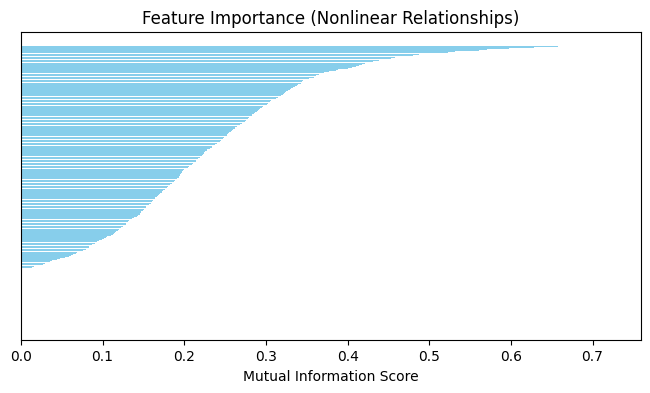

In [15]:
# Plot MI Scores
plt.figure(figsize=(8, 4))
plt.barh(mi_df['Feature'], mi_df['MI_Score'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title('Feature Importance (Nonlinear Relationships)')
plt.gca().invert_yaxis()  # Highest MI on top
plt.yticks([])  # This removes y-axis labels entirely
plt.show()

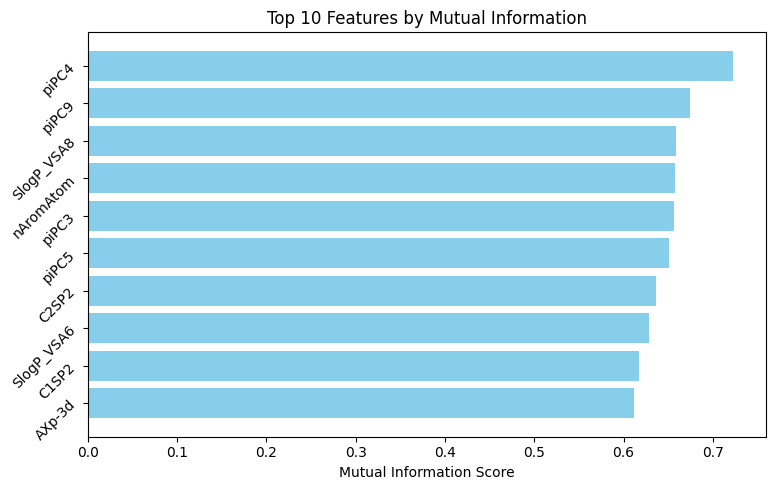

In [16]:
top_n = 10  # Adjust as needed
mi_df_top = mi_df.head(top_n)  # Select top N features

plt.figure(figsize=(8, 5))
plt.barh(mi_df_top['Feature'], mi_df_top['MI_Score'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title(f'Top {top_n} Features by Mutual Information')
plt.gca().invert_yaxis()  # Highest MI on top
plt.tight_layout()
plt.yticks(rotation = 45)
plt.show()

In [17]:
# Select top-k features
top_features = mi_df.head(10)['Feature'].values
print(f"Top predictive descriptors: {top_features}")

Top predictive descriptors: ['piPC4' 'piPC9' 'SlogP_VSA8' 'nAromAtom' 'piPC3' 'piPC5' 'C2SP2'
 'SlogP_VSA6' 'C1SP2' 'AXp-3d']


## Plot the most MI-Correlated Descriptors with the BA

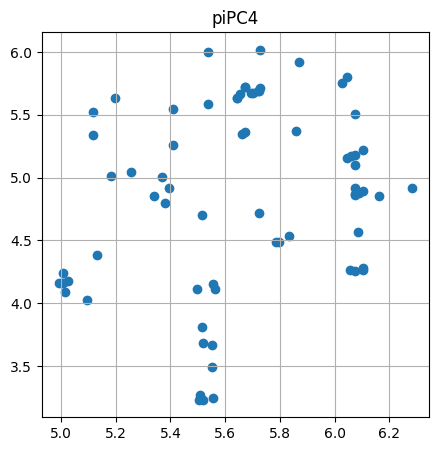

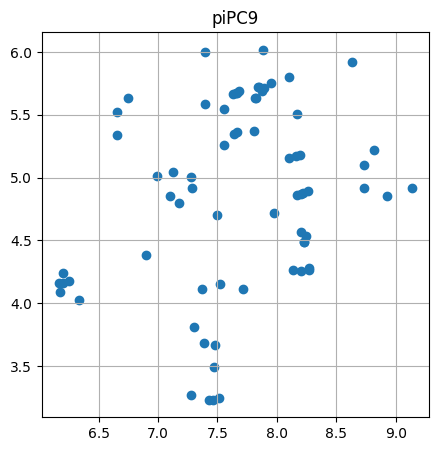

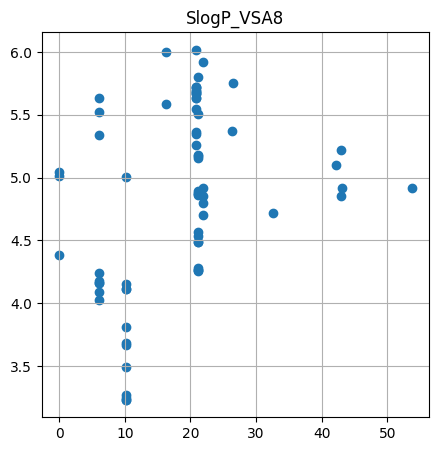

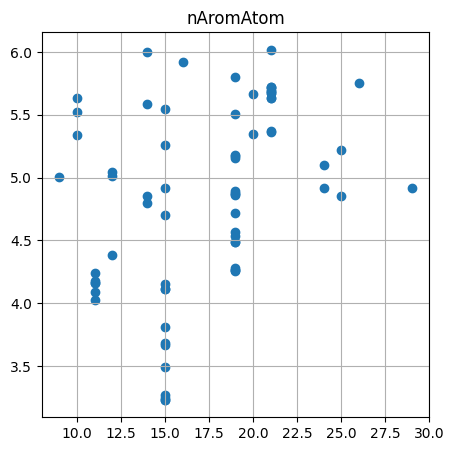

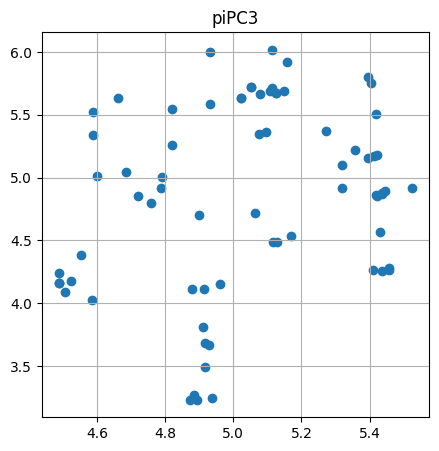

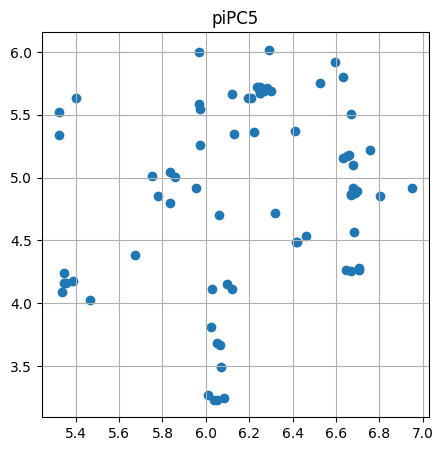

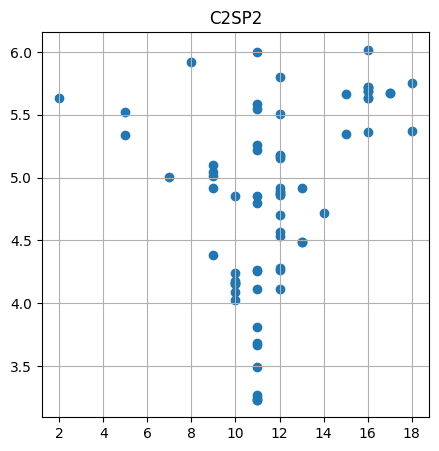

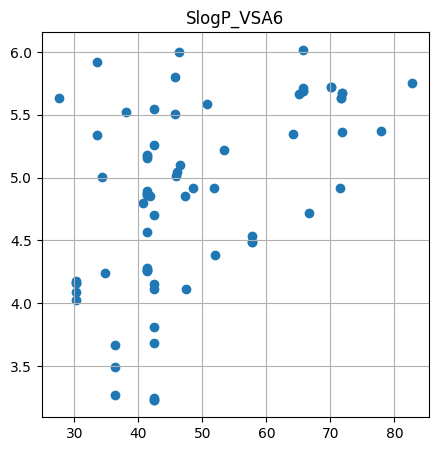

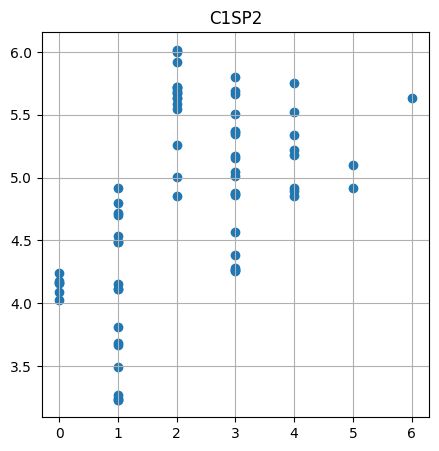

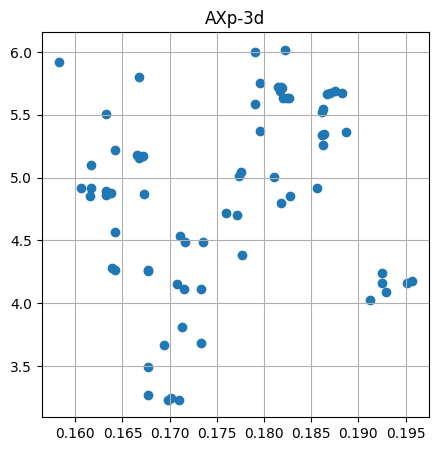

In [18]:
for top in top_features:
  plt.figure(figsize = (5,5))
  plt.scatter(x[top], activity)
  plt.grid()
  plt.title(top)
  plt.show()

## Plot the MI Function

In [19]:
from scipy.stats import gaussian_kde

In [20]:
# Compute KDE for joint and marginals
xy = np.vstack([x[top_features[0]], np.array(activity)[:, 0]])
joint_kde = gaussian_kde(xy)(xy)
x_kde = gaussian_kde(x[top_features[0]])(x[top_features[0]])
y_kde = gaussian_kde(np.array(activity)[:, 0])(np.array(activity)[:, 0])

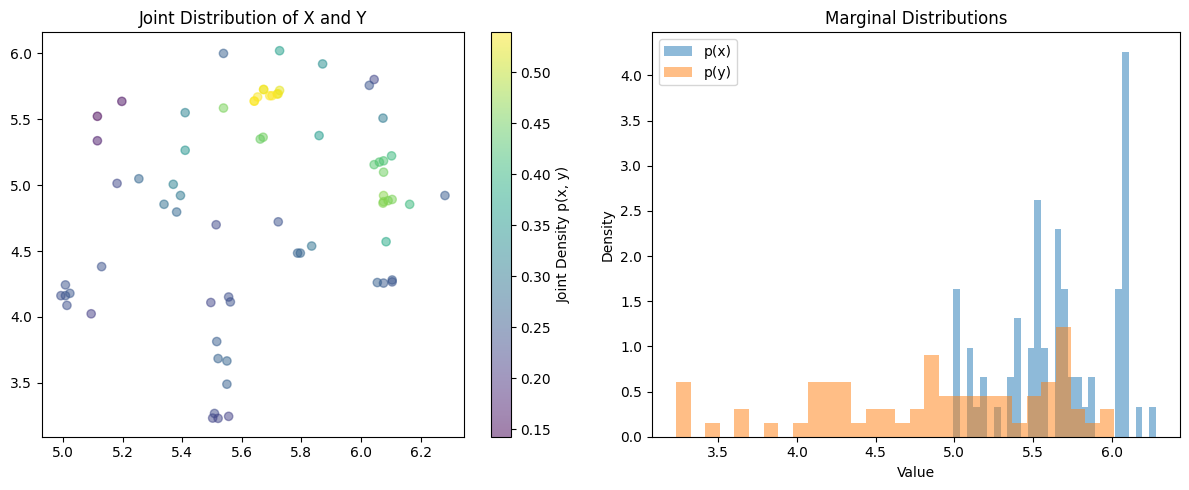

In [21]:
plt.figure(figsize=(12, 5))

# Plot Joint Distribution (scatter with KDE coloring)
plt.subplot(1, 2, 1)
plt.scatter(x[top_features[0]], np.array(activity)[:, 0], c=joint_kde, cmap='viridis', alpha=0.5)
plt.colorbar(label='Joint Density p(x, y)')
plt.title('Joint Distribution of X and Y')

# Plot Marginal Distributions
plt.subplot(1, 2, 2)
plt.hist(x[top_features[0]], bins=30, density=True, alpha=0.5, label='p(x)')
plt.hist(np.array(activity)[:, 0], bins=30, density=True, alpha=0.5, label='p(y)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Marginal Distributions')
plt.legend()

#plt.suptitle(f"Mutual Information I(X; Y) = {mi[0]:.4f}", y=1.05)
plt.tight_layout()
plt.show()

## Select the most relevant features given by MI

In [22]:
mi_df.head()

,Feature,MI_Score
1008,piPC4,0.723093
1013,piPC9,0.674604
969,SlogP_VSA8,0.658585
2,nAromAtom,0.657084
1007,piPC3,0.656417


In [23]:
mi_df.shape

(1218, 2)

In [24]:
mi_df_greater = mi_df[ mi_df['MI_Score']>=0.5 ]

In [25]:
mi_df_greater.shape

(33, 2)

In [33]:
for i in mi_df_greater['Feature'].tolist():
  print( '{},'.format(i))

piPC4,
piPC9,
SlogP_VSA8,
nAromAtom,
piPC3,
piPC5,
C2SP2,
SlogP_VSA6,
C1SP2,
AXp-3d,
nBondsA,
nAromBond,
TpiPC10,
piPC8,
ATSC3c,
AXp-6d,
Xch-6d,
NaasC,
piPC10,
n6Ring,
piPC6,
Xp-7dv,
CIC1,
SssCH2,
AXp-4d,
SMR_VSA3,
MATS3c,
PEOE_VSA11,
AATSC2se,
GATS4are,
PEOE_VSA5,
C1SP3,
AATS4d,


In [27]:
np.expand_dims(x['piPC4'], axis = -1).shape

(71, 1)

In [28]:
import seaborn as sns

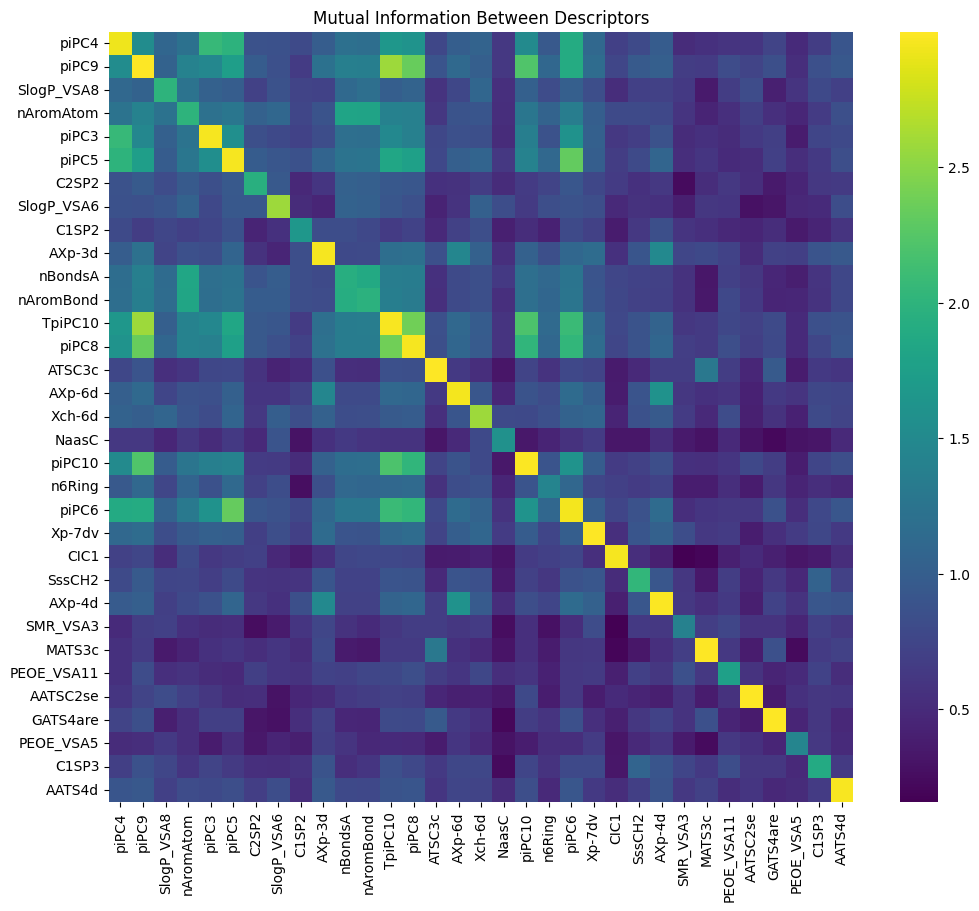

In [34]:
# Compute MI between all descriptor pairs
mi_matrix = pd.DataFrame(index= mi_df_greater['Feature'].tolist() , columns= mi_df_greater['Feature'].tolist() )
for i in mi_df_greater['Feature'].tolist():
    for j in mi_df_greater['Feature'].tolist():
        mi_matrix.loc[i, j] = mutual_info_regression(
            np.expand_dims(x[i], axis = -1),
            x[j])[0]



# Plot MI matrix
plt.figure(figsize=(12, 10))
sns.heatmap(mi_matrix.astype(float), cmap='viridis')
plt.title("Mutual Information Between Descriptors")
plt.show()

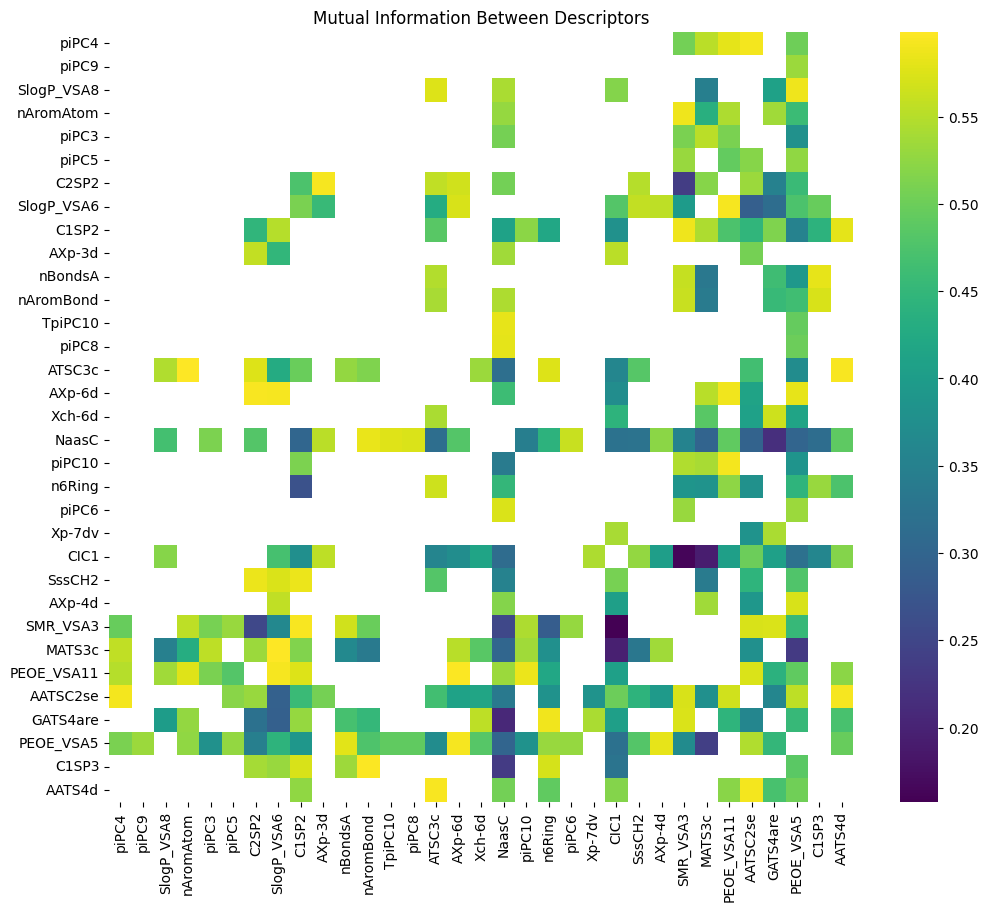

In [35]:
# Plot MI matrix
mi_matrix_less = mi_matrix[ mi_matrix <= 0.6]
plt.figure(figsize=(12, 10))
sns.heatmap(mi_matrix_less.astype(float), cmap='viridis')
plt.title("Mutual Information Between Descriptors")
plt.show()